In [2]:
!pip install tensorflow keras

In [3]:
!unzip Train_UQcUa52.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('train.csv')
df

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3
...,...,...
48995,48995.png,2
48996,48996.png,4
48997,48997.png,9
48998,48998.png,3


In [9]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
img_path = r'C:\Users\hp\Desktop\MAJOR PROJECT\college\mnist\Images\train'
# Make sure to escape backslashes in the path

X = np.array([img_to_array(load_img(img_path + '\\' + df['filename'][i], target_size=(28, 28, 1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [11]:
y = df['label']

In [12]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


9


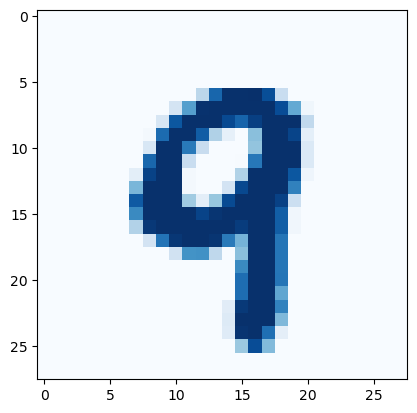

In [13]:
image_index = 21006
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Blues')

######  red' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

0


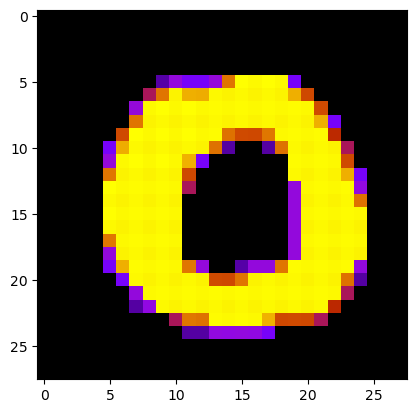

In [14]:
image_index = 10000
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='gnuplot')

2


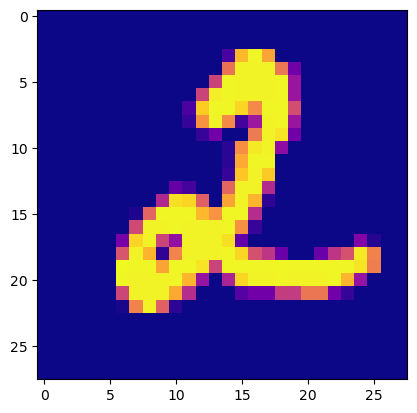

In [15]:
image_index = 10001
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='plasma')

# TRAIN TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 38, stratify=np.array(y))

In [17]:
x_train.shape

(39200, 28, 28, 1)

In [18]:
x_test.shape

(9800, 28, 28, 1)

In [19]:
x_train /= 255
x_test /= 255

# Model creation

In [20]:
input_shape = (28,28,1)
output_class = 100

In [33]:
from keras.layers import Activation

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('tanh'))  # Example: Using tanh activation function
model.add(Dropout(0.3))
model.add(Dense(output_class))
model.add(Activation('softmax'))  # Example: Using softmax activation function

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [34]:
model.fit(x = x_train, y = y_train, batch_size= 32, epochs=10, validation_data = (x_test,y_test))

Epoch 1/10
1225/1225 [==============================] - 14s 11ms/step - loss: 0.2619 - accuracy: 0.9230 - val_loss: 0.1114 - val_accuracy: 0.9674
Epoch 2/10
1225/1225 [==============================] - 14s 11ms/step - loss: 0.0999 - accuracy: 0.9698 - val_loss: 0.0810 - val_accuracy: 0.9745
Epoch 3/10
1225/1225 [==============================] - 14s 11ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0744 - val_accuracy: 0.9764
Epoch 4/10
1225/1225 [==============================] - 14s 11ms/step - loss: 0.0522 - accuracy: 0.9827 - val_loss: 0.0646 - val_accuracy: 0.9800
Epoch 5/10
1225/1225 [==============================] - 14s 11ms/step - loss: 0.0399 - accuracy: 0.9871 - val_loss: 0.0685 - val_accuracy: 0.9790
Epoch 6/10
1225/1225 [==============================] - 14s 11ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0602 - val_accuracy: 0.9826
Epoch 7/10
1225/1225 [==============================] - 14s 11ms/step - loss: 0.0273 - accuracy: 0.9904 - val_loss: 0.0674 -

1/1 [==============================] - 0s 50ms/step
Predicted output: 4


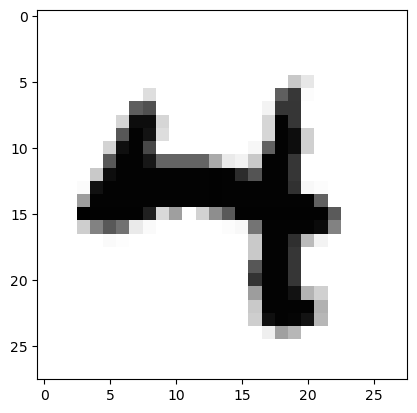

In [35]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 [==============================] - 0s 18ms/step
Predicted output: 6


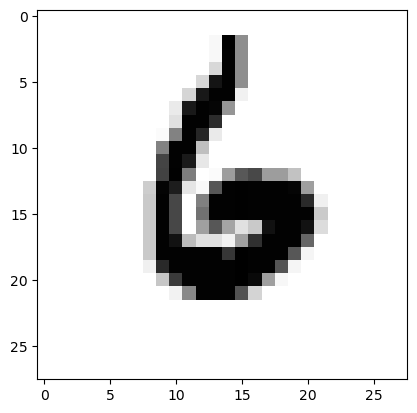

In [36]:
image_index = 1006
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

In [37]:
# Print accuracy scores
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9982143044471741
Test accuracy: 0.9805101752281189
